# 4.10_Task_Coding Etiquette & Excel Reporting

## Contents
### Part 1
#### Task 1
### Importing Libraries
### Importing Data
### Path to Storage
#### Task 2
#### Task 3
#### Task 4
#### Task 5
#### Task 6
#### Task 7
#### Task 8
#### Task 9
#### Task 10

## Part 1

### Task 1

Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

### Importing Libraries

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Path to Storage

In [6]:
# Path to storage location
path = r'C:\Users\ihs10539\Achievement 4 Project'

### Importing Data

In [8]:
df_ords_prods_custs_merge = pd.read_pickle(os.path.join(path, '02_Data', '02.02_Prepared Data', '4.9_task_pt1_ords_prods_custs_merge.pkl'))

### Task 2

Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [12]:
df_ords_prods_custs_merge.columns

Index(['Unnamed: 0_x', 'order_id', 'user_id', 'eval_set', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0.1',
       'Unnamed: 0_y', 'product_name', 'aisle_id', 'department_id', 'prices',
       'match', 'busiest_day', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'average_spend', 'spender_flag',
       'customer_frequency', 'frequency_flag', 'first_name', 'last_name',
       'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', '_merge'],
      dtype='object')

In [14]:
# The columns 'First Name', 'Surnam', 'Gender', 'State', 'Age', 'date_joined', 'n_dependants', 'fam_status' & 'income' contain PII information.

### Task 3

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [18]:
df_ords_prods_custs_merge['state'].value_counts()

state
Pennsylvania            667007
California              659695
Rhode Island            656777
Georgia                 656249
New Mexico              654400
Arizona                 653864
North Carolina          651790
Oklahoma                651661
Alaska                  648451
Minnesota               647738
Massachusetts           646275
Wyoming                 644191
Virginia                641280
Missouri                640576
Texas                   640285
Colorado                639173
Maine                   638479
North Dakota            638391
Alabama                 637863
Kansas                  637418
Louisiana               637414
Delaware                636906
South Carolina          636677
Oregon                  636332
Arkansas                636070
Nevada                  636034
New York                635912
Montana                 635181
South Dakota            633649
Illinois                632928
Hawaii                  632786
Washington              632722
Mi

Creating 'Region' Column

In [21]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']),'region'] = 'region 1'

In [23]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']),'region'] = 'region 2'

In [25]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['state'].isin(['Delaware', 'Maryland', 'Virginia', 'District of Columbia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']),'region'] = 'region 3'

In [27]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']),'region'] = 'region 4'

In [29]:
df_ords_prods_custs_merge.columns

Index(['Unnamed: 0_x', 'order_id', 'user_id', 'eval_set', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0.1',
       'Unnamed: 0_y', 'product_name', 'aisle_id', 'department_id', 'prices',
       'match', 'busiest_day', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'average_spend', 'spender_flag',
       'customer_frequency', 'frequency_flag', 'first_name', 'last_name',
       'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', '_merge', 'region'],
      dtype='object')

Filtering Region and Spending_flag columns

In [32]:
Filter_Region_Spending = df_ords_prods_custs_merge.groupby(['region', 'spender_flag']).size().reset_index(name='count')

In [34]:
Filter_Region_Spending

,region,spender_flag,count
0,region 1,High_spender,18639
1,region 1,Low_spender,5703253
2,region 2,High_spender,29265
3,region 2,Low_spender,7566800
4,region 3,High_spender,40577
5,region 3,Low_spender,10749519
6,region 4,High_spender,31238
7,region 4,Low_spender,8260441


The Region 3 contains the highest numbers regarding High and Low spending habits. The Region 1 shows the lowest numbers regarding High and Low spending habits.

### Task 4

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [39]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['max_order'] < 5, 'exclusion_flag'] = 'Low-Activity'

In [41]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['max_order'] >= 5, 'exclusion_flag'] = 'Regular-Activity'

In [43]:
df_ords_prods_custs_merge['exclusion_flag'].value_counts()

exclusion_flag
Regular-Activity    30959687
Low-Activity         1440045
Name: count, dtype: int64

In [45]:
df_ords_prods_custs_merge_exclusion =  df_ords_prods_custs_merge[df_ords_prods_custs_merge['exclusion_flag']== 'Regular-Activity']

In [47]:
df_ords_prods_custs_merge_exclusion['exclusion_flag'].value_counts()

exclusion_flag
Regular-Activity    30959687
Name: count, dtype: int64

Exporting Dataframe

In [50]:
df_ords_prods_custs_merge_exclusion.to_pickle(os.path.join(path, '02_Data','02.02_Prepared Data', '4.10_Task_ords_prods_custs_exclusion.pkl'))

### Task 5

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [54]:
conditions = [
    (df_ords_prods_custs_merge['age'] < 30) & (df_ords_prods_custs_merge['n_dependants'] == 0),  # Single Adult
    (df_ords_prods_custs_merge['age'].between(25, 40)) & (df_ords_prods_custs_merge['n_dependants'] > 0),  # Young Parent
    (df_ords_prods_custs_merge['age'] > 30) & (df_ords_prods_custs_merge['n_dependants'] >= 2),  # Established Family
    (df_ords_prods_custs_merge['age'] > 50) & (df_ords_prods_custs_merge['n_dependants'] == 0),  # Senior Shopper
    (df_ords_prods_custs_merge['income'] < 40000)  # Budget-Conscious Shopper
]

In [56]:
choices = [
    "Single Adult",
    "Young Parent",
    "Established Family",
    "Senior Shopper",
    "Budget-Conscious Shopper"
]

In [58]:
df_ords_prods_custs_merge['profile'] = np.select(conditions, choices, default="High Budget Shopper")

In [60]:
df_ords_prods_custs_merge.head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,state,age,date_joined,n_dependants,marital_status,income,_merge,region,exclusion_flag,profile
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,Alabama,31,2/17/2019,3,married,40423,both,region 3,Regular-Activity,Young Parent
1,0,2539329,1,prior,1,2,8,NaN,14084,2,...,Alabama,31,2/17/2019,3,married,40423,both,region 3,Regular-Activity,Young Parent
2,0,2539329,1,prior,1,2,8,NaN,12427,3,...,Alabama,31,2/17/2019,3,married,40423,both,region 3,Regular-Activity,Young Parent
3,0,2539329,1,prior,1,2,8,NaN,26088,4,...,Alabama,31,2/17/2019,3,married,40423,both,region 3,Regular-Activity,Young Parent
4,0,2539329,1,prior,1,2,8,NaN,26405,5,...,Alabama,31,2/17/2019,3,married,40423,both,region 3,Regular-Activity,Young Parent


Filtering Profile and Spending_flag Columns

In [63]:
filter_profile_spending = df_ords_prods_custs_merge.groupby(['profile', 'spender_flag']).size().reset_index(name='count')

In [65]:
filter_profile_spending

,profile,spender_flag,count
0,Budget-Conscious Shopper,Low_spender,560711
1,Established Family,High_spender,39479
2,Established Family,Low_spender,10337573
3,High Budget Shopper,High_spender,38220
4,High Budget Shopper,Low_spender,9920623
5,Senior Shopper,High_spender,15744
6,Senior Shopper,Low_spender,3921321
7,Single Adult,High_spender,5362
8,Single Adult,Low_spender,1507640
9,Young Parent,High_spender,20914


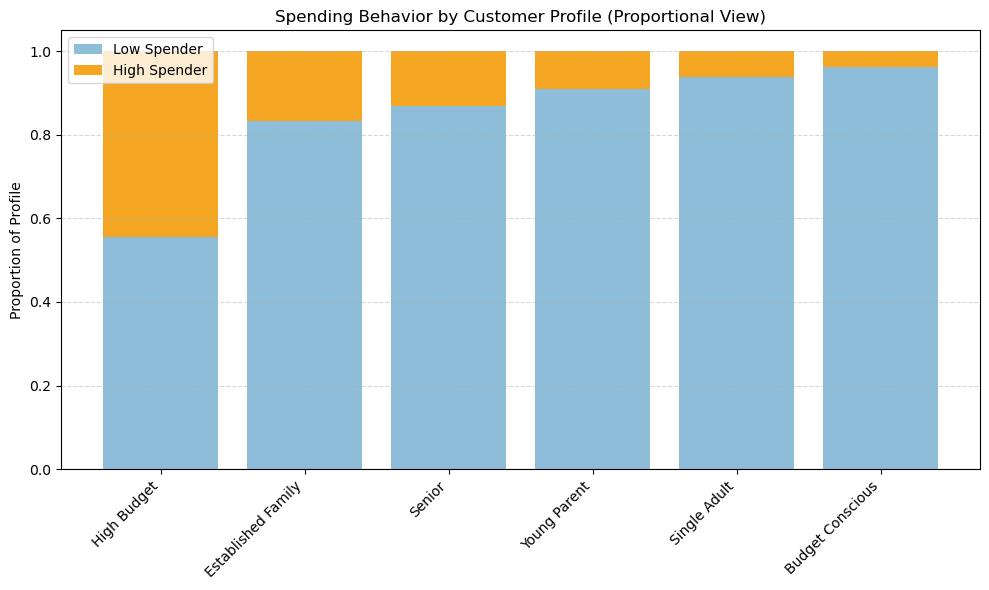

In [67]:
# Replace this with your actual aggregated data
data = pd.DataFrame({
    'profile': ['Budget Conscious', 'Established Family', 'High Budget', 'Senior', 'Single Adult', 'Young Parent'],
    'low_spender': [500, 300, 100, 200, 150, 250],
    'high_spender': [20, 60, 80, 30, 10, 25]
})

# Compute proportions per profile
data['total'] = data['low_spender'] + data['high_spender']
data['low_prop'] = data['low_spender'] / data['total']
data['high_prop'] = data['high_spender'] / data['total']

# Sort by high spender proportion if needed
data = data.sort_values(by='high_prop', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
bars1 = plt.bar(data['profile'], data['low_prop'], label='Low Spender', color='#8dbdd8')
bars2 = plt.bar(data['profile'], data['high_prop'], bottom=data['low_prop'], label='High Spender', color='#f5a623')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Proportion of Profile')
plt.title('Spending Behavior by Customer Profile (Proportional View)')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Task 6

Create an appropriate visualization to show the distribution of profiles.

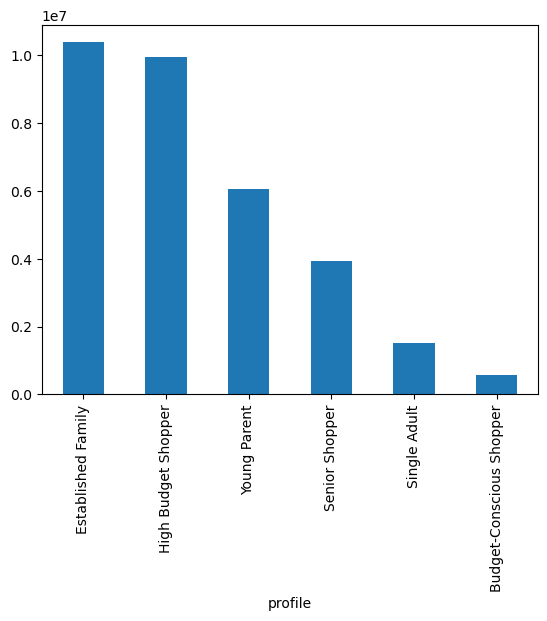

In [96]:
barchart_profile_spending = df_ords_prods_custs_merge['profile'].value_counts().plot.bar()

Export barchart

In [107]:
barchart_profile_spending.figure.savefig(r'C:\Users\ihs10539\Achievement 4 Project\04_Analysis\04.03_Visualizations\profile_bar.png')

### Task 7

Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [111]:
Agg_cust_pro = df_ords_prods_custs_merge.groupby("profile").agg({
    "days_since_prior_order": ["max", "mean", "min"],
    "prices": ["max", "mean", "min"]
})

In [113]:
Agg_cust_pro

days_since_prior_order                 prices  \
                                            max       mean  min    max   
profile                                                                  
Budget-Conscious Shopper                   30.0  11.676536  0.0   25.0   
Established Family                         30.0  11.127530  0.0   25.0   
High Budget Shopper                        30.0  11.065233  0.0   25.0   
Senior Shopper                             30.0  10.994620  0.0   25.0   
Single Adult                               30.0  11.199566  0.0   25.0   
Young Parent                               30.0  11.122038  0.0   25.0   

                                         
                              mean  min  
profile                                  
Budget-Conscious Shopper  6.487099  1.0  
Established Family        7.792727  1.0  
High Budget Shopper       7.867926  1.0  
Senior Shopper            7.793032  1.0  
Single Adult              7.772699  1.0  
Young Parent              7.785480  1.0

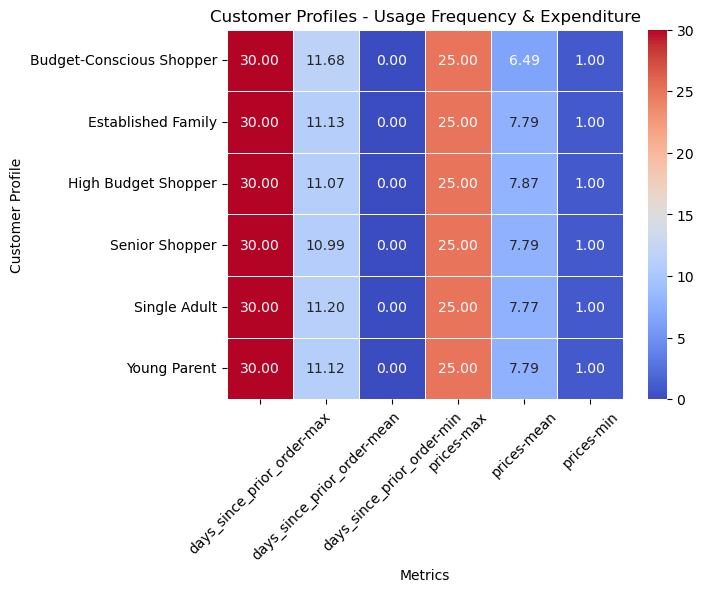

In [115]:
heatmap_cust_pro = sns.heatmap(Agg_cust_pro, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Mejorar diseño
plt.title("Customer Profiles - Usage Frequency & Expenditure")
plt.xlabel("Metrics")
plt.ylabel("Customer Profile")
plt.xticks(rotation=45)

# Mostrar gráfico
plt.show()

Export Heatmap Profile

In [118]:
heatmap_cust_pro.figure.savefig(r'C:\Users\ihs10539\Achievement 4 Project\04_Analysis\04.03_Visualizations\heatmap_cust_pro.png')

### Task 8

Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [122]:
profile_reg_dept = df_ords_prods_custs_merge.groupby(["Region", "profile"]).size().unstack()

In [124]:
print(profile_reg_dept)

profile   Budget-Conscious Shopper  Established Family  High Budget Shopper  \
Region                                                                        
Region 1                    101147             1847065              1741268   
Region 2                    129865             2414392              2375280   
Region 3                    193152             3450454              3296511   
Region 4                    136547             2665141              2545784   

profile   Senior Shopper  Single Adult  Young Parent  
Region                                                
Region 1          696598        276243       1059571  
Region 2          928636        345219       1402673  
Region 3         1292318        515322       2042339  
Region 4         1019513        376218       1548476  


Heatmap Visualization

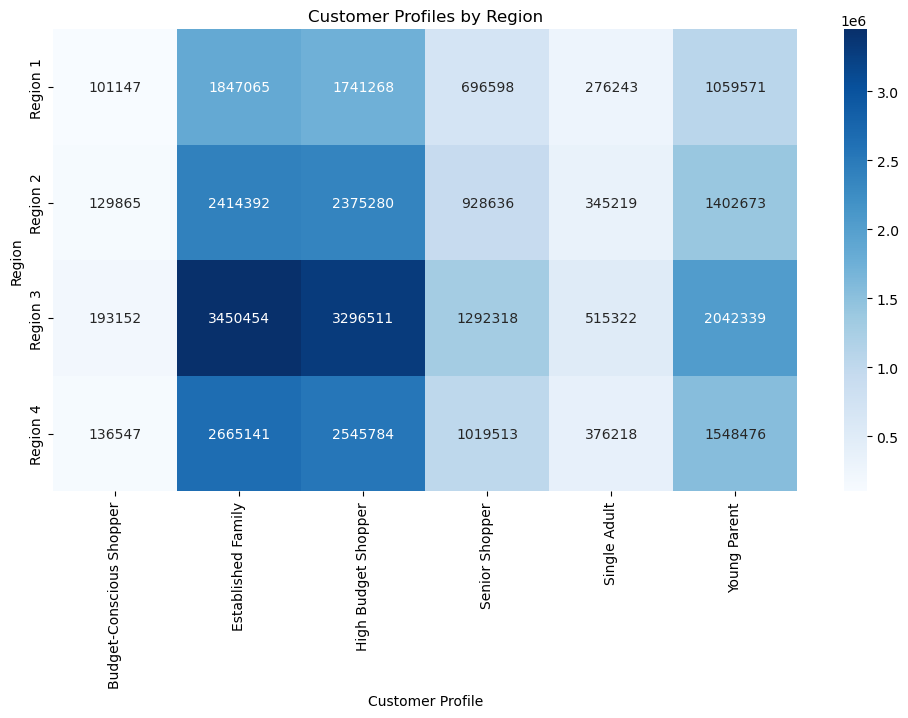

In [127]:
plt.figure(figsize=(12,6))
heatmap_profile_reg_dept = sns.heatmap(profile_reg_dept, cmap="Blues", annot=True, fmt="d")
plt.title("Customer Profiles by Region")
plt.xlabel("Customer Profile")
plt.ylabel("Region")
plt.show()

Export Heatmap Regions

In [130]:
heatmap_profile_reg_dept.figure.savefig(r'C:\Users\ihs10539\Achievement 4 Project\04_Analysis\04.03_Visualizations\heatmap_profile_reg_dept.png')

### Task 9

Produce suitable charts to illustrate your results and export them in your project folder

In [134]:
# Done

### Task 10

Tidy up your script, export your final data set, and save your notebook.

In [138]:
# Done

In [140]:
# Export the updated dataframe as a pickle file
df_ords_prods_custs_merge.to_pickle(os.path.join(r'C:\Users\ihs10539\Achievement 4 Project\04_Analysis\04.03_Visualizations\4.9_task_ords_prods_custs_merge.pkl'))

OSError: [Errno 28] No space left on device